# RandomForest Regressor:

It gives the best r2 and mse values, but has an issue with extrapolating from data set. meaning it wont be able to accurately predict a future value if it is beyond the range of current data.

# NN-Model:

Gives good r2 values in the range of .80 to .99 with decent mse values. The model can extrapolate from dataset meaning it will be better to predict values beyond the range of current dataset. The NN model that overall worked better was one with 2 hidden layers and 3X neurons.

# SVR:
the best result out of the kernels was of linear with an r2 value of 0.54, which is way lower than the r2 values of the other two. hence this model is not fit for our dataset.

# Conclusion: 
i would suggest going forward with NN model and refining its outcomes and projecting for future with it.

## Reasons for choosing NN:

1- Abilty to extrapolate form dataset<br>
2- It is a flexabile model that adapts itself to the shape of a dataset.So it can dynamically pick the best type of regression(linear, logistic, polynomial, etc)<br>
3- Is giving good r2 values.




In [2]:
# import dependencies
from path import Path
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# imports for database connection
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, func

# import these to view table column headers & rows
from sqlalchemy.orm import sessionmaker
from sqlalchemy import select
%matplotlib inline

C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages

# load in the files
file = Path("../Resources/merged_covid.csv")
file1= Path("../Resources/government_regulation.csv")
file2= Path("../Resources/covid_stats.csv")
file3= Path("../Resources/merged_covid_stats_population.csv")

# read the files
df= pd.read_csv(file)
df_gov=pd.read_csv(file1)
df_st=pd.read_csv(file2)
df_pop=pd.read_csv(file3)


In [3]:
engine = create_engine("sqlite:///../Resources/covid_db.db")

In [4]:
# reflect an existing database into a new model (creates base class for automap schema)
Base = automap_base()

In [5]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
Base.classes.keys()

['covid_stats', 'government_regulation']

In [7]:
# save references to each table
covid_stats = Base.classes.covid_stats
government_regulation = Base.classes.government_regulation

In [8]:
# Create session (link) from Python to the database
session = sessionmaker(bind=engine)()

In [9]:
# View table column headers & rows - covid_stats
covid_stats_table = select('*').select_from(covid_stats)
covid_stats_result = session.execute(covid_stats_table).fetchall()
# print(covid_stats.__table__.columns.keys())
# print(covid_stats_result)

In [10]:
# View table column headers & rows - government_regulation
government_regulation_table = select('*').select_from(government_regulation)
government_regulation_result = session.execute(government_regulation_table).fetchall()
# print(government_regulation.__table__.columns.keys())
# print(government_regulation_result)

In [11]:
# Merge covid_stats_table with government regulation_table
joined = session.query(covid_stats.primary_key_reaction,\
                        covid_stats.date_updated,\
                        covid_stats.iso_code,\
                        covid_stats.continent,\
                        covid_stats.location,\
                        covid_stats.population,\
                        covid_stats.population_density,\
                        covid_stats.median_age,\
                        covid_stats.new_cases,\
                        covid_stats.percentage_of_Pop_New_Cases,\
                        covid_stats.new_deaths,\
                        covid_stats.percentage_of_Pop_New_Deaths,\
                        covid_stats.new_tests,\
                        covid_stats.percentage_of_Pop_New_Tests,\
                        covid_stats.total_cases_updated,\
                        covid_stats.percentage_of_Pop_Total_Cases,\
                        covid_stats.total_deaths_updated,\
                        covid_stats.percentage_of_Pop_Total_Deaths,\
                        covid_stats.total_tests_updated,\
                        covid_stats.percentage_of_Pop_Total_Tests,\
                       government_regulation.primary_key_response,\
                       government_regulation.StringencyIndex_updated,\
                       government_regulation.percentage_change_stringency,\
                       government_regulation.StringencyLegacyIndex_updated,\
                       government_regulation.GovernmentResponseIndex_updated,\
                       government_regulation.percentage_change_GovernmentResponse,\
                       government_regulation.ContainmentHealthIndex_updated,\
                       government_regulation.percentage_change_ContainmentHealth,\
                       government_regulation.EconomicSupportIndex_updated,\
                       government_regulation.percentage_change_EconomicSupport)\
        .join(government_regulation,government_regulation.primary_key_response == covid_stats.primary_key_reaction)

# save the query results as a Pandas DataFrame and set the index
df = pd.DataFrame(joined, columns=['primary_key_reaction',
                                             'date_updated',
                                             'iso_code',
                                             'continent',
                                             'location',
                                             'population',
                                             'population_density',
                                             'median_age',
                                             'new_cases',
                                             'percentage_of_Pop_New_Cases',
                                             'new_deaths',
                                             'percentage_of_Pop_New_Deaths',
                                             'new_tests',
                                             'percentage_of_Pop_New_Tests',
                                             'total_cases_updated',
                                             'percentage_of_Pop_Total_Cases',
                                             'total_deaths_updated',
                                             'percentage_of_Pop_Total_Deaths',
                                             'total_tests_updated',
                                             'percentage_of_Pop_Total_Tests',
                                             'primary_key_response',
                                             'StringencyIndex_updated',
                                             'percentage_change_stringency',
                                             'StringencyLegacyIndex_updated',
                                             'GovernmentResponseIndex_updated',
                                             'percentage_change_GovernmentResponse',
                                             'ContainmentHealthIndex_updated',
                                             'percentage_change_ContainmentHealth',
                                             'EconomicSupportIndex_updated',
                                             'percentage_change_EconomicSupport'
                                             ])

In [12]:
# preview 
df

,primary_key_reaction,date_updated,iso_code,continent,location,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,...,primary_key_response,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
0,ABW2020-03-13,2020-03-13,ABW,North America,Aruba,106766,584.800,41.2,2,0.001873,...,ABW2020-03-13,0.00,0.000000,0.00,2.56,0.000000,3.03,0.000000,0.0,0.0
1,ABW2020-03-19,2020-03-19,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,...,ABW2020-03-19,33.33,0.000000,42.86,29.49,15.015601,34.85,15.016502,0.0,0.0
2,ABW2020-03-20,2020-03-20,ABW,North America,Aruba,106766,584.800,41.2,2,0.001873,...,ABW2020-03-20,33.33,0.000000,42.86,29.49,0.000000,34.85,0.000000,0.0,0.0
3,ABW2020-03-21,2020-03-21,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,...,ABW2020-03-21,44.44,33.333333,60.71,37.18,26.076636,43.94,26.083214,0.0,0.0
4,ABW2020-03-22,2020-03-22,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,...,ABW2020-03-22,44.44,0.000000,60.71,37.18,0.000000,43.94,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32272,ZWE2020-08-27,2020-08-27,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,55,0.000370,...,ZWE2020-08-27,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32273,ZWE2020-08-28,2020-08-28,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,41,0.000276,...,ZWE2020-08-28,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32274,ZWE2020-08-29,2020-08-29,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,96,0.000646,...,ZWE2020-08-29,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32275,ZWE2020-08-30,2020-08-30,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,18,0.000121,...,ZWE2020-08-30,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0


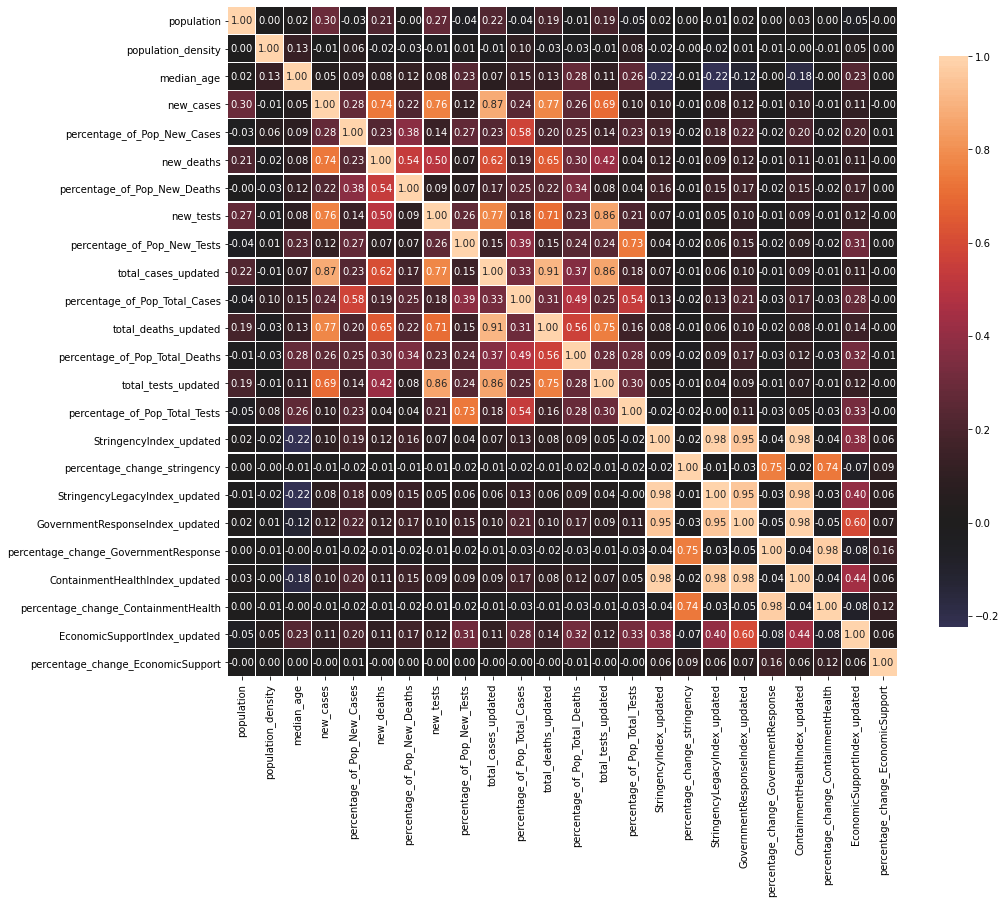

In [21]:
import seaborn as sns

def correlation_heatmap(df):
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df)

In [13]:
# Check merged_covid.csv
print(df.dtypes)
print(df.shape)

# Display df
df.head()

primary_key_reaction                     object
date_updated                             object
iso_code                                 object
continent                                object
location                                 object
population                                int64
population_density                      float64
median_age                              float64
new_cases                                 int64
percentage_of_Pop_New_Cases             float64
new_deaths                                int64
percentage_of_Pop_New_Deaths            float64
new_tests                                 int64
percentage_of_Pop_New_Tests             float64
total_cases_updated                       int64
percentage_of_Pop_Total_Cases           float64
total_deaths_updated                      int64
percentage_of_Pop_Total_Deaths          float64
total_tests_updated                       int64
percentage_of_Pop_Total_Tests           float64
primary_key_response                    

,primary_key_reaction,date_updated,iso_code,continent,location,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,...,primary_key_response,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
0,ABW2020-03-13,2020-03-13,ABW,North America,Aruba,106766,584.8,41.2,2,0.001873,...,ABW2020-03-13,0.00,0.000000,0.00,2.56,0.000000,3.03,0.000000,0.0,0.0
1,ABW2020-03-19,2020-03-19,ABW,North America,Aruba,106766,584.8,41.2,0,0.000000,...,ABW2020-03-19,33.33,0.000000,42.86,29.49,15.015601,34.85,15.016502,0.0,0.0
2,ABW2020-03-20,2020-03-20,ABW,North America,Aruba,106766,584.8,41.2,2,0.001873,...,ABW2020-03-20,33.33,0.000000,42.86,29.49,0.000000,34.85,0.000000,0.0,0.0
3,ABW2020-03-21,2020-03-21,ABW,North America,Aruba,106766,584.8,41.2,0,0.000000,...,ABW2020-03-21,44.44,33.333333,60.71,37.18,26.076636,43.94,26.083214,0.0,0.0
4,ABW2020-03-22,2020-03-22,ABW,North America,Aruba,106766,584.8,41.2,0,0.000000,...,ABW2020-03-22,44.44,0.000000,60.71,37.18,0.000000,43.94,0.000000,0.0,0.0


In [14]:
# check merged df for null values.
df.describe()

,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,new_deaths,percentage_of_Pop_New_Deaths,new_tests,percentage_of_Pop_New_Tests,total_cases_updated,...,percentage_of_Pop_Total_Tests,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
count,3.227700e+04,32277.000000,32277.000000,32277.000000,32277.000000,32277.000000,3.227700e+04,3.227700e+04,32277.000000,3.227700e+04,...,32277.000000,32277.000000,32277.000000,32277.000000,32277.000000,32277.000000,32277.000000,32277.000000,32277.000000,32277.000000
mean,5.400962e+07,214.197672,31.332131,778.920656,0.001991,26.154042,5.072572e-07,8.487867e+03,0.024842,4.745188e+04,...,1.928935,58.044062,1.119343,64.012734,55.398830,1.086273,58.043087,1.037969,40.854943,0.176124
std,1.764115e+08,728.593605,9.175007,4360.424882,0.005546,138.626066,2.001007e-06,5.284508e+04,0.074306,2.709722e+05,...,5.493011,28.321004,20.384550,28.648400,24.321508,14.496031,25.638560,15.068222,32.776192,8.648105
min,9.834000e+04,1.980000,15.100000,-2461.000000,-0.221254,-1918.000000,-6.790114e-05,-3.743000e+03,-0.039824,0.000000e+00,...,0.000000,0.000000,-100.000000,0.000000,0.000000,-100.000000,0.000000,-100.000000,0.000000,-100.000000
25%,4.822233e+06,32.333000,23.500000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,7.200000e+01,...,0.000000,39.810000,0.000000,50.000000,44.870000,0.000000,44.700000,0.000000,0.000000,0.000000
50%,1.132662e+07,82.805000,31.100000,18.000000,0.000182,0.000000,0.000000e+00,0.000000e+00,0.000000,1.331000e+03,...,0.000000,65.740000,0.000000,72.620000,62.180000,0.000000,65.150000,0.000000,50.000000,0.000000
75%,3.892834e+07,204.430000,39.800000,221.000000,0.001469,4.000000,2.433856e-07,1.911000e+03,0.013440,1.297400e+04,...,0.968671,80.560000,0.000000,85.710000,73.720000,0.000000,77.270000,0.000000,75.000000,0.000000
max,1.439324e+09,7915.731000,48.200000,78761.000000,0.189258,4928.000000,1.193442e-04,1.194086e+06,1.657412,5.997163e+06,...,70.895970,100.000000,1965.107914,100.000000,96.150000,655.459272,100.000000,655.425220,100.000000,400.000000


In [15]:
df

,primary_key_reaction,date_updated,iso_code,continent,location,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,...,primary_key_response,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
0,ABW2020-03-13,2020-03-13,ABW,North America,Aruba,106766,584.800,41.2,2,0.001873,...,ABW2020-03-13,0.00,0.000000,0.00,2.56,0.000000,3.03,0.000000,0.0,0.0
1,ABW2020-03-19,2020-03-19,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,...,ABW2020-03-19,33.33,0.000000,42.86,29.49,15.015601,34.85,15.016502,0.0,0.0
2,ABW2020-03-20,2020-03-20,ABW,North America,Aruba,106766,584.800,41.2,2,0.001873,...,ABW2020-03-20,33.33,0.000000,42.86,29.49,0.000000,34.85,0.000000,0.0,0.0
3,ABW2020-03-21,2020-03-21,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,...,ABW2020-03-21,44.44,33.333333,60.71,37.18,26.076636,43.94,26.083214,0.0,0.0
4,ABW2020-03-22,2020-03-22,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,...,ABW2020-03-22,44.44,0.000000,60.71,37.18,0.000000,43.94,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32272,ZWE2020-08-27,2020-08-27,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,55,0.000370,...,ZWE2020-08-27,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32273,ZWE2020-08-28,2020-08-28,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,41,0.000276,...,ZWE2020-08-28,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32274,ZWE2020-08-29,2020-08-29,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,96,0.000646,...,ZWE2020-08-29,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32275,ZWE2020-08-30,2020-08-30,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,18,0.000121,...,ZWE2020-08-30,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0


In [19]:
data = df[['new_cases','new_deaths','total_deaths_updated','total_cases_updated','StringencyIndex_updated','GovernmentResponseIndex_updated','ContainmentHealthIndex_updated','EconomicSupportIndex_updated']]
correlation = data.corr(method='pearson')
correlation


,new_cases,new_deaths,total_deaths_updated,total_cases_updated,StringencyIndex_updated,GovernmentResponseIndex_updated,ContainmentHealthIndex_updated,EconomicSupportIndex_updated
new_cases,1.000000,0.739646,0.774397,0.871639,0.100946,0.115415,0.104744,0.106042
new_deaths,0.739646,1.000000,0.650501,0.615995,0.116550,0.120839,0.109978,0.109707
total_deaths_updated,0.774397,0.650501,1.000000,0.908942,0.075513,0.104478,0.083951,0.142759
total_cases_updated,0.871639,0.615995,0.908942,1.000000,0.074981,0.099599,0.085540,0.112381
StringencyIndex_updated,0.100946,0.116550,0.075513,0.074981,1.000000,0.953152,0.981316,0.375440
GovernmentResponseIndex_updated,0.115415,0.120839,0.104478,0.099599,0.953152,1.000000,0.982446,0.596544
ContainmentHealthIndex_updated,0.104744,0.109978,0.083951,0.085540,0.981316,0.982446,1.000000,0.436355
EconomicSupportIndex_updated,0.106042,0.109707,0.142759,0.112381,0.375440,0.596544,0.436355,1.000000


In [15]:
df.columns

Index(['primary_key_reaction', 'date_updated', 'iso_code', 'continent',
       'location', 'population', 'population_density', 'median_age',
       'new_cases', 'percentage_of_Pop_New_Cases', 'new_deaths',
       'percentage_of_Pop_New_Deaths', 'new_tests',
       'percentage_of_Pop_New_Tests', 'total_cases_updated',
       'percentage_of_Pop_Total_Cases', 'total_deaths_updated',
       'percentage_of_Pop_Total_Deaths', 'total_tests_updated',
       'percentage_of_Pop_Total_Tests', 'primary_key_response',
       'StringencyIndex_updated', 'percentage_change_stringency',
       'StringencyLegacyIndex_updated', 'GovernmentResponseIndex_updated',
       'percentage_change_GovernmentResponse',
       'ContainmentHealthIndex_updated', 'percentage_change_ContainmentHealth',
       'EconomicSupportIndex_updated', 'percentage_change_EconomicSupport'],
      dtype='object')

## DF New Deaths

In [23]:
# Create a df to test impact of some features on 'new deaths'
# adding economic support index to the model made the accuracy to drop.
df_new_deaths=df[['date_updated','population','population_density','median_age','new_cases','StringencyIndex_updated','new_deaths']]
df_new_deaths

,date_updated,population,population_density,median_age,new_cases,StringencyIndex_updated,new_deaths
0,2020-03-13,106766,584.800,41.2,2,0.00,0
1,2020-03-19,106766,584.800,41.2,0,33.33,0
2,2020-03-20,106766,584.800,41.2,2,33.33,0
3,2020-03-21,106766,584.800,41.2,0,44.44,0
4,2020-03-22,106766,584.800,41.2,0,44.44,0
...,...,...,...,...,...,...,...
32272,2020-08-27,14862927,42.729,19.6,55,80.56,13
32273,2020-08-28,14862927,42.729,19.6,41,80.56,10
32274,2020-08-29,14862927,42.729,19.6,96,80.56,6
32275,2020-08-30,14862927,42.729,19.6,18,80.56,1


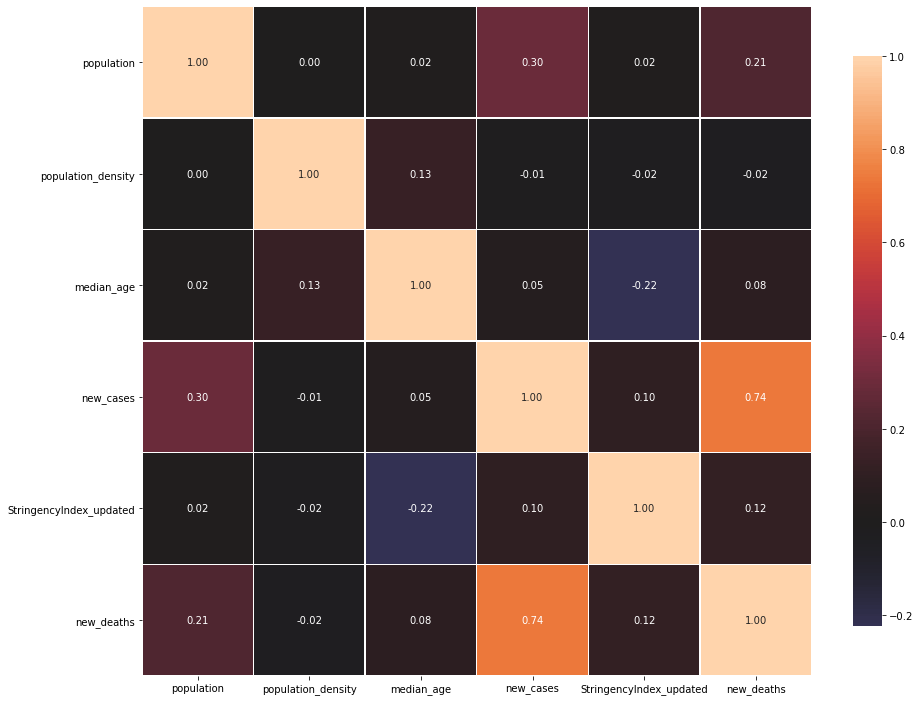

In [24]:
correlation_heatmap(df_new_deaths)

In [80]:
# Check types
df_new_deaths.dtypes

date_updated                object
population                   int64
population_density         float64
median_age                 float64
new_cases                    int64
StringencyIndex_updated    float64
new_deaths                   int64
dtype: object

In [85]:
le = LabelEncoder()
df_new_deaths['date_updated'] = le.fit_transform(df_new_deaths['date_updated'])
print(df_new_deaths.dtypes)
df_new_deaths


date_updated                 int64
population                   int64
population_density         float64
median_age                 float64
new_cases                    int64
StringencyIndex_updated    float64
new_deaths                   int64
dtype: object


C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date_updated,population,population_density,median_age,new_cases,StringencyIndex_updated,new_deaths
0,72,106766,584.800,41.2,2,0.00,0
1,78,106766,584.800,41.2,0,33.33,0
2,79,106766,584.800,41.2,2,33.33,0
3,80,106766,584.800,41.2,0,44.44,0
4,81,106766,584.800,41.2,0,44.44,0
...,...,...,...,...,...,...,...
32272,239,14862927,42.729,19.6,55,80.56,13
32273,240,14862927,42.729,19.6,41,80.56,10
32274,241,14862927,42.729,19.6,96,80.56,6
32275,242,14862927,42.729,19.6,18,80.56,1


In [86]:
# Check stats
df_new_deaths.describe()

,date_updated,population,population_density,median_age,new_cases,StringencyIndex_updated,new_deaths
count,32277.00000,3.227700e+04,32277.000000,32277.000000,32277.000000,32277.000000,32277.000000
mean,141.07572,5.400962e+07,214.197672,31.332131,778.920656,58.044062,26.154042
std,62.97139,1.764115e+08,728.593605,9.175007,4360.424882,28.321004,138.626066
min,0.00000,9.834000e+04,1.980000,15.100000,-2461.000000,0.000000,-1918.000000
25%,95.00000,4.822233e+06,32.333000,23.500000,0.000000,39.810000,0.000000
50%,145.00000,1.132662e+07,82.805000,31.100000,18.000000,65.740000,0.000000
75%,194.00000,3.892834e+07,204.430000,39.800000,221.000000,80.560000,4.000000
max,243.00000,1.439324e+09,7915.731000,48.200000,78761.000000,100.000000,4928.000000


In [87]:
# Drop rows with null values
df_new_deaths=df_new_deaths.dropna(how='any')
df_new_deaths.shape

(32277, 7)

# SVR MODEL

In [26]:
# create features(X) and target(y) sets
X = df_new_deaths.drop(['new_deaths'],axis=1).values

y =df_new_deaths['new_deaths'].values
y = y.reshape(-1,1)

In [27]:
# Split dataset into training and testing
# train 95% of data, test 5%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# # scale data
# X_scaler = StandardScaler()
# X_scaler.fit(X_train)

# y_scaler= StandardScaler()
# y_scaler.fit(y_train)

# y_train_scaled=y_scaler.transform(y_train)
# y_test_scaled=y_scaler.transform(y_test)

# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

In [23]:
# check number of samples (n_samples)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

30663
1614
30663
1614


In [24]:
# create SVR model
n_samples, n_features = 30663, 5
rng = np.random.RandomState(5)
y_train = rng.randn(n_samples)
X_train = rng.randn(n_samples, n_features)
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.1))
regr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

In [25]:
# make predictions using test data
y_pred = regr.predict(X_test)

# return R-squared for the prediction
regr.score(X_test, y_test)

-0.042899657103014466

In [19]:
# create features(X) and target(y) sets
X = df_new_deaths.drop(['new_deaths'],axis=1).values

y =df_new_deaths['new_deaths'].values
y = y.reshape(-1,1)

In [20]:
# Split dataset into training and testing
# train 95% of data, test 5%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [21]:
# create SVR model
n_samples, n_features = 30663, 5
rng = np.random.RandomState(5)
y_train = rng.randn(n_samples)
X_train = rng.randn(n_samples, n_features)
regr = make_pipeline(StandardScaler(), SVR(kernel='linear',C=1.0, epsilon=0.1))
regr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(kernel='linear'))])

In [22]:
# make predictions using test data
y_pred = regr.predict(X_test)

# return R-squared for the prediction
regr.score(X_test, y_test)

-32070281.17128136

## DF Total Deaths

In [24]:
# Create a df to test impact of some features on 'total deaths'
df_death_ml=df[['population','population_density','median_age','total_cases_updated','StringencyIndex_updated','total_deaths_updated']]
df_death_ml

,population,population_density,median_age,total_cases_updated,StringencyIndex_updated,total_deaths_updated
0,106766,584.800,41.2,2,0.00,0
1,106766,584.800,41.2,2,33.33,0
2,106766,584.800,41.2,4,33.33,0
3,106766,584.800,41.2,4,44.44,0
4,106766,584.800,41.2,4,44.44,0
...,...,...,...,...,...,...
32272,14862927,42.729,19.6,6251,80.56,179
32273,14862927,42.729,19.6,6292,80.56,189
32274,14862927,42.729,19.6,6388,80.56,195
32275,14862927,42.729,19.6,6406,80.56,196


In [25]:
# Check stats
df_death_ml.describe()

,population,population_density,median_age,total_cases_updated,StringencyIndex_updated,total_deaths_updated
count,3.227700e+04,32277.000000,32277.000000,3.227700e+04,32277.000000,32277.000000
mean,5.400962e+07,214.197672,31.332131,4.745188e+04,58.044062,2121.634662
std,1.764115e+08,728.593605,9.175007,2.709722e+05,28.321004,10533.562293
min,9.834000e+04,1.980000,15.100000,0.000000e+00,0.000000,0.000000
25%,4.822233e+06,32.333000,23.500000,7.200000e+01,39.810000,1.000000
50%,1.132662e+07,82.805000,31.100000,1.331000e+03,65.740000,26.000000
75%,3.892834e+07,204.430000,39.800000,1.297400e+04,80.560000,279.000000
max,1.439324e+09,7915.731000,48.200000,5.997163e+06,100.000000,183069.000000


In [26]:
# Check to make sure dtypes are appropriate .
df_death_ml.dtypes

population                   int64
population_density         float64
median_age                 float64
total_cases_updated          int64
StringencyIndex_updated    float64
total_deaths_updated         int64
dtype: object

In [27]:
# Check shape before dropping na
df_death_ml.shape

(32277, 6)

In [28]:
# Drop rows with null values
df_death_ml=df_death_ml.dropna(how='any')
df_death_ml.shape

(32277, 6)

## DF New Cases

In [29]:
# Create a df to test impact of some features on 'new cases'
df_new_cases=df[['population','population_density','median_age','ContainmentHealthIndex_updated','StringencyIndex_updated','new_cases']]
df_new_cases.head()

,population,population_density,median_age,ContainmentHealthIndex_updated,StringencyIndex_updated,new_cases
0,106766,584.8,41.2,3.03,0.00,2
1,106766,584.8,41.2,34.85,33.33,0
2,106766,584.8,41.2,34.85,33.33,2
3,106766,584.8,41.2,43.94,44.44,0
4,106766,584.8,41.2,43.94,44.44,0


In [30]:
# Check stats
df_new_cases.describe()

,population,population_density,median_age,ContainmentHealthIndex_updated,StringencyIndex_updated,new_cases
count,3.227700e+04,32277.000000,32277.000000,32277.000000,32277.000000,32277.000000
mean,5.400962e+07,214.197672,31.332131,58.043087,58.044062,778.920656
std,1.764115e+08,728.593605,9.175007,25.638560,28.321004,4360.424882
min,9.834000e+04,1.980000,15.100000,0.000000,0.000000,-2461.000000
25%,4.822233e+06,32.333000,23.500000,44.700000,39.810000,0.000000
50%,1.132662e+07,82.805000,31.100000,65.150000,65.740000,18.000000
75%,3.892834e+07,204.430000,39.800000,77.270000,80.560000,221.000000
max,1.439324e+09,7915.731000,48.200000,100.000000,100.000000,78761.000000


In [31]:
# Drop rows with null values
df_new_cases=df_new_cases.dropna(how='any')
df_new_cases.shape

(32277, 6)

## DF Total Cases

In [129]:
# Create a df to test impact of some features on 'total cases'
df_cases_ml=df[['population','population_density','median_age','ContainmentHealthIndex_updated','StringencyIndex_updated','total_cases_updated']]
df_cases_ml.head()

,population,population_density,median_age,ContainmentHealthIndex_updated,StringencyIndex_updated,total_cases_updated
0,106766,584.8,41.2,3.03,0.00,2
1,106766,584.8,41.2,34.85,33.33,2
2,106766,584.8,41.2,34.85,33.33,4
3,106766,584.8,41.2,43.94,44.44,4
4,106766,584.8,41.2,43.94,44.44,4


# The best model for predicting new deaths was deep neural network with three hidden layers and 3x neurons. with an r2 value of ~0.80

## Predicting Number of New Deaths- with NN Model


In [88]:
# create features(X) and target(y) sets
X = df_new_deaths.drop(['new_deaths'],axis=1).values

y = df_new_deaths['new_deaths'].values
y = y.reshape(-1,1)

In [89]:
# Split dataset into training and testing
# train 95% of data, test 5%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# scale data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

y_scaler= StandardScaler()
y_scaler.fit(y_train)

y_train_scaled=y_scaler.transform(y_train)
y_test_scaled=y_scaler.transform(y_test)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 12)                84        
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 13        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
30663/30663 [==============================] - 2s 64us/sample - loss: 0.5124 - mean_squared_error: 0.5124
Epoch 2/100
30663/30663 [==============================] - 2s 67us/sample - loss: 0.3841 - mean_squared_error: 0.3841
Epoch 3/100
30663/30663 [==============================] - 2s 63us/sample - loss: 0.3629 - mean_squared_error: 0.3629
Epoch 4/100
30663/30663 [==============================] - 2s 63us/sample - loss: 0.3540 - mean_squared_error: 0.3540
Epoch 5/100
30663/30663 [======================

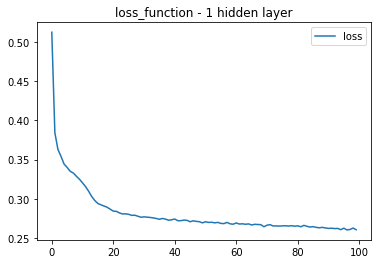

0.7428704622748263
0.7614108948713374


In [90]:
# define model - shallow neural net
number_hidden_nodes = 12
number_input_features =6

nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu"))
nn.add(Dense(1, activation="linear"))

nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train_scaled, epochs=100)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train_scaled, y_train_pred))
print(r2_score(y_test_scaled, y_test_pred))


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 18)                126       
_________________________________________________________________
dense_34 (Dense)             (None, 9)                 171       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 10        
Total params: 307
Trainable params: 307
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
30663/30663 [==============================] - 2s 77us/sample - loss: 0.4789 - mean_squared_error: 0.4789
Epoch 2/200
30663/30663 [==============================] - 2s 77us/sample - loss: 0.3561 - mean_squared_error: 0.3561
Epoch 3/200
30663/30663 [==============================] - 2s 70us/sample - loss: 0.3328 - mean_squared_error: 0.3328
Epoch 4/200
30663/30663 [======

30663/30663 [==============================] - 1s 41us/sample - loss: 0.1670 - mean_squared_error: 0.1670
Epoch 132/200
30663/30663 [==============================] - 1s 43us/sample - loss: 0.1658 - mean_squared_error: 0.1658
Epoch 133/200
30663/30663 [==============================] - 1s 42us/sample - loss: 0.1682 - mean_squared_error: 0.1682
Epoch 134/200
30663/30663 [==============================] - 1s 43us/sample - loss: 0.1698 - mean_squared_error: 0.1698
Epoch 135/200
30663/30663 [==============================] - 1s 40us/sample - loss: 0.1673 - mean_squared_error: 0.1673
Epoch 136/200
30663/30663 [==============================] - 1s 45us/sample - loss: 0.1673 - mean_squared_error: 0.1673
Epoch 137/200
30663/30663 [==============================] - 1s 41us/sample - loss: 0.1656 - mean_squared_error: 0.1656
Epoch 138/200
30663/30663 [==============================] - 1s 40us/sample - loss: 0.1640 - mean_squared_error: 0.1640
Epoch 139/200
30663/30663 [===========================

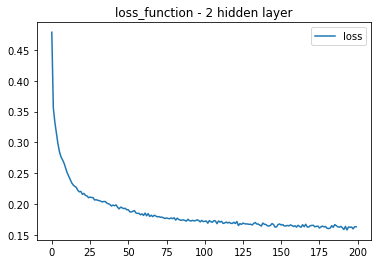

0.8366599451592673
0.88837200845292


In [91]:
# Define the model - deep neural net
number_input_features = 6
hidden_nodes_layer1 = 18
hidden_nodes_layer2 =9

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))


nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train_scaled, epochs=200)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 2 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train_scaled, y_train_pred))
print(r2_score(y_test_scaled, y_test_pred))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 18)                126       
_________________________________________________________________
dense_37 (Dense)             (None, 9)                 171       
_________________________________________________________________
dense_38 (Dense)             (None, 4)                 40        
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 5         
Total params: 342
Trainable params: 342
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
30663/30663 [==============================] - 1s 44us/sample - loss: 0.4289 - mean_squared_error: 0.4289
Epoch 2/200
30663/30663 [==============================] - 1s 39us/sample - loss: 0.3424 - mean_squared_error: 0.3424
Epoch 3/200
30663

30663/30663 [==============================] - 2s 52us/sample - loss: 0.1578 - mean_squared_error: 0.1578
Epoch 130/200
30663/30663 [==============================] - 2s 51us/sample - loss: 0.1547 - mean_squared_error: 0.1547
Epoch 131/200
30663/30663 [==============================] - 2s 51us/sample - loss: 0.1581 - mean_squared_error: 0.1581
Epoch 132/200
30663/30663 [==============================] - 2s 53us/sample - loss: 0.1558 - mean_squared_error: 0.1558
Epoch 133/200
30663/30663 [==============================] - 2s 52us/sample - loss: 0.1631 - mean_squared_error: 0.1631
Epoch 134/200
30663/30663 [==============================] - 2s 53us/sample - loss: 0.1555 - mean_squared_error: 0.1555
Epoch 135/200
30663/30663 [==============================] - 2s 54us/sample - loss: 0.1595 - mean_squared_error: 0.1595
Epoch 136/200
30663/30663 [==============================] - 2s 52us/sample - loss: 0.1578 - mean_squared_error: 0.1578
Epoch 137/200
30663/30663 [===========================

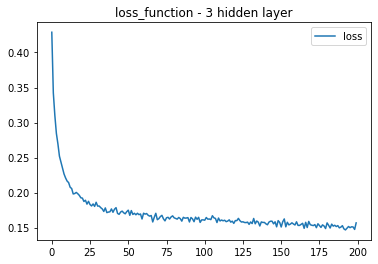

0.8522673386336921
0.897586632363413


In [92]:
# Define the model - deep neural net
number_input_features = 6
hidden_nodes_layer1 = 18
hidden_nodes_layer2 =9
hidden_nodes_layer3 =4

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Third hidden layer
nn.add(Dense(units=hidden_nodes_layer3, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))


nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train_scaled, epochs=200)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 3 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train_scaled, y_train_pred))
print(r2_score(y_test_scaled, y_test_pred))

# Predicting Number of New cases- with NN Model

In [72]:
# create features(X) and target(y) sets

X = df_new_cases.drop(['new_cases'],axis=1).values

y = df_new_cases['new_cases'].values

y = y.reshape(-1,1)

In [ ]:

# Split dataset into training and testing
# train 95% of data, test 5%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# scale data
X_scaler = StandardScaler()

X_scaler.fit(X_train)

y_scaler= StandardScaler()

y_scaler.fit(y_train)

y_train_scaled=y_scaler.transform(y_train)

y_test_scaled=y_scaler.transform(y_test)

X_train_scaled = X_scaler.transform(X_train)

X_test_scaled = X_scaler.transform(X_test)



Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 11        
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
30663/30663 [==============================] - 2s 69us/sample - loss: 0.6873 - mean_squared_error: 0.6873
Epoch 2/100
30663/30663 [==============================] - 2s 64us/sample - loss: 0.4261 - mean_squared_error: 0.4261
Epoch 3/100
30663/30663 [==============================] - 2s 65us/sample - loss: 0.4098 - mean_squared_error: 0.4098
Epoch 4/100
30663/30663 [==============================] - 2s 63us/sample - loss: 0.3996 - mean_squared_error: 0.3996
Epoch 5/100
30663/30663 [=======================

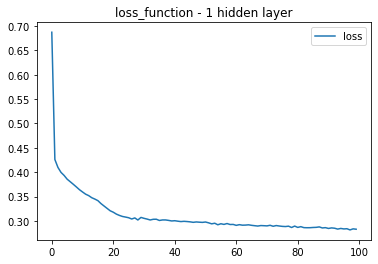

0.7198046977848869
0.7688023715866851


In [73]:
# define model - shallow neural net
number_hidden_nodes = 10
number_input_features = 5

nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu"))
nn.add(Dense(1, activation="linear"))

nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train_scaled, epochs=100)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train_scaled, y_train_pred))
print(r2_score(y_test_scaled, y_test_pred))


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 15)                90        
_________________________________________________________________
dense_29 (Dense)             (None, 6)                 96        
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 7         
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
30663/30663 [==============================] - 2s 79us/sample - loss: 0.6114 - mean_squared_error: 0.6114
Epoch 2/200
30663/30663 [==============================] - 2s 77us/sample - loss: 0.3793 - mean_squared_error: 0.3793
Epoch 3/200
30663/30663 [==============================] - 2s 78us/sample - loss: 0.3520 - mean_squared_error: 0.3520
Epoch 4/200
30663/30663 [======

30663/30663 [==============================] - 2s 69us/sample - loss: 0.2206 - mean_squared_error: 0.2206
Epoch 132/200
30663/30663 [==============================] - 2s 69us/sample - loss: 0.2211 - mean_squared_error: 0.2211
Epoch 133/200
30663/30663 [==============================] - 2s 68us/sample - loss: 0.2203 - mean_squared_error: 0.2203
Epoch 134/200
30663/30663 [==============================] - ETA: 0s - loss: 0.2140 - mean_squared_error: 0.21 - 2s 69us/sample - loss: 0.2193 - mean_squared_error: 0.2193
Epoch 135/200
30663/30663 [==============================] - 2s 68us/sample - loss: 0.2197 - mean_squared_error: 0.2197
Epoch 136/200
30663/30663 [==============================] - 2s 69us/sample - loss: 0.2233 - mean_squared_error: 0.2233
Epoch 137/200
30663/30663 [==============================] - 2s 70us/sample - loss: 0.2205 - mean_squared_error: 0.2205
Epoch 138/200
30663/30663 [==============================] - 2s 70us/sample - loss: 0.2213 - mean_squared_error: 0.2213
Ep

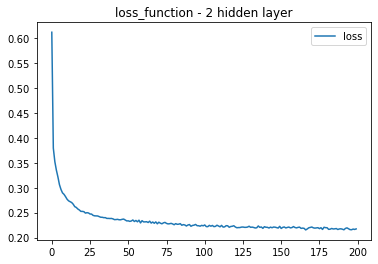

0.7893981640385823
0.840146796245594


In [75]:
# Define the model - deep neural net
number_input_features = 5
hidden_nodes_layer1 = 15
hidden_nodes_layer2 =6

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))


nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train_scaled, epochs=200)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 2 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train_scaled, y_train_pred))
print(r2_score(y_test_scaled, y_test_pred))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 15)                90        
_________________________________________________________________
dense_25 (Dense)             (None, 6)                 96        
_________________________________________________________________
dense_26 (Dense)             (None, 3)                 21        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 4         
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
30663/30663 [==============================] - 2s 81us/sample - loss: 0.5187 - mean_squared_error: 0.5187
Epoch 2/200
30663/30663 [==============================] - 2s 75us/sample - loss: 0.3877 - mean_squared_error: 0.3877
Epoch 3/200
30663

30663/30663 [==============================] - 2s 76us/sample - loss: 0.1960 - mean_squared_error: 0.1960
Epoch 130/200
30663/30663 [==============================] - 2s 77us/sample - loss: 0.1985 - mean_squared_error: 0.1985
Epoch 131/200
30663/30663 [==============================] - 2s 79us/sample - loss: 0.2044 - mean_squared_error: 0.2044
Epoch 132/200
30663/30663 [==============================] - 2s 75us/sample - loss: 0.2011 - mean_squared_error: 0.2011
Epoch 133/200
30663/30663 [==============================] - 2s 79us/sample - loss: 0.2019 - mean_squared_error: 0.2019
Epoch 134/200
30663/30663 [==============================] - 2s 78us/sample - loss: 0.2005 - mean_squared_error: 0.2005
Epoch 135/200
30663/30663 [==============================] - 2s 81us/sample - loss: 0.2038 - mean_squared_error: 0.2038
Epoch 136/200
30663/30663 [==============================] - 2s 81us/sample - loss: 0.2016 - mean_squared_error: 0.2016
Epoch 137/200
30663/30663 [===========================

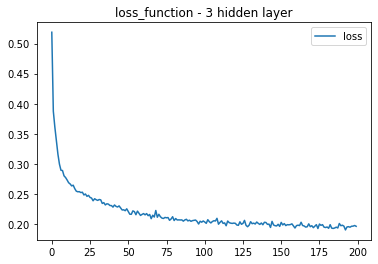

0.8150519868079568
0.8113615879717901


In [74]:
# Define the model - deep neural net
number_input_features = 5
hidden_nodes_layer1 = 15
hidden_nodes_layer2 =6
hidden_nodes_layer3 =3

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Third hidden layer
nn.add(Dense(units=hidden_nodes_layer3, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))


nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train_scaled, epochs=200)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 3 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train_scaled, y_train_pred))
print(r2_score(y_test_scaled, y_test_pred))

## Predicting Number of Deaths- with NN Model

In [120]:
df_death_ml.head()

,population,population_density,median_age,total_cases_updated,StringencyIndex_updated,total_deaths_updated
0,106766,584.8,41.2,2,0.00,0
1,106766,584.8,41.2,2,33.33,0
2,106766,584.8,41.2,4,33.33,0
3,106766,584.8,41.2,4,44.44,0
4,106766,584.8,41.2,4,44.44,0


In [116]:
# create features(X) and target(y) sets
X = df_death_ml.drop(['total_deaths_updated'],axis=1).values

y = df_death_ml['total_deaths_updated'].values
y = y.reshape(-1,1)

In [117]:
# Check shape for num of features
X.shape

(32277, 5)

In [118]:
# Split dataset into training and testing
# train 95% of data, test 5%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# scale data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

y_scaler= StandardScaler()
y_scaler.fit(y_train)

y_train_scaled=y_scaler.transform(y_train)
y_test_scaled=y_scaler.transform(y_test)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


 the mean_squared error is :0.00008 and the r2_score is:1.000
Feature: 0, Score: 0.02718
Feature: 1, Score: 0.01602
Feature: 2, Score: 0.03681
Feature: 3, Score: 0.82979
Feature: 4, Score: 0.09020


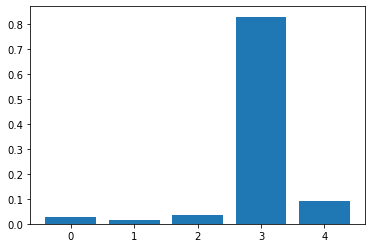

In [119]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
# X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train_scaled, y_train_scaled)
# predict y
y_pred=model.predict(X_test_scaled)
# print(y_pred)

# calculate mean square error
mse=mean_squared_error(y_test_scaled,y_pred)

# calculate r2 score
r2=r2_score(y_test_scaled, y_pred)

print(f' the mean_squared error is :{mse:.5f} and the r2_score is:{r2:.3f}')



# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
29840/29840 [==============================] - 1s 27us/sample - loss: 0.7467 - mean_squared_error: 0.7467
Epoch 2/100
29840/29840 [==============================] - 1s 27us/sample - loss: 0.1267 - mean_squared_error: 0.1267
Epoch 3/100
29840/29840 [==============================] - 1s 26us/sample - loss: 0.1144 - mean_squared_error: 0.1144
Epoch 4/100
29840/29840 [=========================

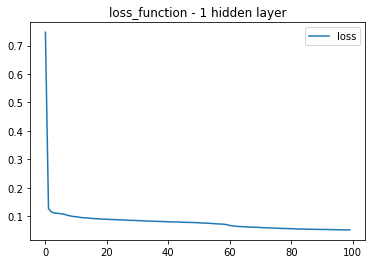

0.9497084081735521
0.9671544562097762


In [23]:
# define model - shallow neural net
number_hidden_nodes = 10
number_input_features = 5

nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu"))
nn.add(Dense(1, activation="linear"))

nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train_scaled, epochs=100)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train_scaled, y_train_pred))
print(r2_score(y_test_scaled, y_test_pred))


In [29]:
# Print y_train and y_test predicted[0]
print(y_train_pred)
print(y_test_pred)

[[-0.16045961]
 [-0.08955172]
 [-0.2725514 ]
 ...
 [-0.17302284]
 [-0.20746163]
 [-0.29250047]]
[[-0.19342211]
 [-0.19606915]
 [-0.31041327]
 ...
 [-0.322844  ]
 [-0.37816182]
 [-0.20905396]]


In [33]:
# Convert the scaled predictions to actual values.
print(y_scaler.inverse_transform(y_train_pred))
print(y_scaler.inverse_transform(y_test_pred))

[[ 471.41553 ]
 [1221.1555  ]
 [-713.77954 ]
 ...
 [ 338.5791  ]
 [ -25.557133]
 [-924.70996 ]]
[[  122.88867 ]
 [   94.90039 ]
 [-1114.1099  ]
 ...
 [-1245.5454  ]
 [-1830.4448  ]
 [  -42.393803]]


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 15)                90        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 16        
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
29840/29840 [==============================] - 1s 29us/sample - loss: 0.5528 - mean_squared_error: 0.5528
Epoch 2/100
29840/29840 [==============================] - 1s 30us/sample - loss: 0.1306 - mean_squared_error: 0.1306
Epoch 3/100
29840/29840 [==============================] - 1s 27us/sample - loss: 0.1160 - mean_squared_error: 0.1160
Epoch 4/100
29840/29840 [==============================] - 1s 29us/sample - loss: 0.1077 - mean_squared_error: 0.1077
Epoch 5/100
29840/29840 [=====================

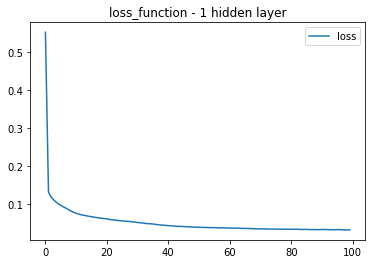

0.9699228881943891
0.9723110146542275


In [19]:
# define model - shallow neural net with 3X
number_hidden_nodes = 15
number_input_features = 5

nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu"))
nn.add(Dense(1, activation="linear"))

nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train_scaled, epochs=100)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train_scaled, y_train_pred))
print(r2_score(y_test_scaled, y_test_pred))

# The best outcomes were from deep neural network with two hidden layers and 3x neurons

## Deep Neural Network

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 6         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
29840/29840 [==============================] - 1s 45us/sample - loss: 0.2164 - mean_squared_error: 0.2164
Epoch 2/100
29840/29840 [==============================] - 1s 33us/sample - loss: 0.1163 - mean_squared_error: 0.1163
Epoch 3/100
29840/29840 [==============================] - 1s 33us/sample - loss: 0.1043 - mean_squared_error: 0.1043
Epoch 4/100
29840/29840 [=======

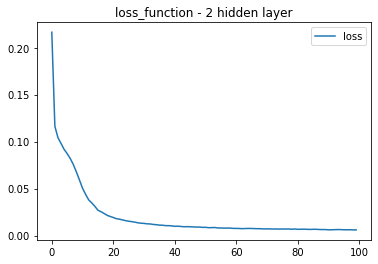

0.9942812309414055
0.9965419753286219


In [21]:
# Define the model - deep neural net
number_input_features = 5
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 5

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))


nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train_scaled, epochs=100)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 2 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train_scaled, y_train_pred))
print(r2_score(y_test_scaled, y_test_pred))
# print(accuracy_score(y_test, y_pred))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 15)                90        
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 80        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 6         
Total params: 176
Trainable params: 176
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
29840/29840 [==============================] - 1s 32us/sample - loss: 0.1871 - mean_squared_error: 0.1871
Epoch 2/1000
29840/29840 [==============================] - 1s 29us/sample - loss: 0.0930 - mean_squared_error: 0.0930
Epoch 3/1000
29840/29840 [==============================] - 1s 30us/sample - loss: 0.0821 - mean_squared_error: 0.0821
Epoch 4/1000
29840/29840 [===

29840/29840 [==============================] - 1s 29us/sample - loss: 0.0053 - mean_squared_error: 0.0053
Epoch 131/1000
29840/29840 [==============================] - 1s 31us/sample - loss: 0.0055 - mean_squared_error: 0.0055
Epoch 132/1000
29840/29840 [==============================] - 1s 26us/sample - loss: 0.0041 - mean_squared_error: 0.0041s - loss: 0.0040 - mean_squared_error: 0.
Epoch 133/1000
29840/29840 [==============================] - 1s 28us/sample - loss: 0.0044 - mean_squared_error: 0.0044
Epoch 134/1000
29840/29840 [==============================] - 1s 29us/sample - loss: 0.0059 - mean_squared_error: 0.0059
Epoch 135/1000
29840/29840 [==============================] - 1s 28us/sample - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 136/1000
29840/29840 [==============================] - 1s 29us/sample - loss: 0.0045 - mean_squared_error: 0.0045
Epoch 137/1000
29840/29840 [==============================] - 1s 27us/sample - loss: 0.0050 - mean_squared_error: 0.0050
Epoch 

29840/29840 [==============================] - 1s 28us/sample - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 265/1000
29840/29840 [==============================] - 1s 28us/sample - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 266/1000
29840/29840 [==============================] - 1s 30us/sample - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 267/1000
29840/29840 [==============================] - 1s 31us/sample - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 268/1000
29840/29840 [==============================] - 1s 32us/sample - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 269/1000
29840/29840 [==============================] - 1s 32us/sample - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 270/1000
29840/29840 [==============================] - 1s 29us/sample - loss: 0.0037 - mean_squared_error: 0.0037
Epoch 271/1000
29840/29840 [==============================] - 1s 30us/sample - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 272/1000
29840/29840 [===================

29840/29840 [==============================] - 1s 30us/sample - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 398/1000
29840/29840 [==============================] - 1s 29us/sample - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 399/1000
29840/29840 [==============================] - 1s 29us/sample - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 400/1000
29840/29840 [==============================] - 1s 28us/sample - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 401/1000
29840/29840 [==============================] - 1s 30us/sample - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 402/1000
29840/29840 [==============================] - 1s 29us/sample - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 403/1000
29840/29840 [==============================] - 1s 29us/sample - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 404/1000
29840/29840 [==============================] - 1s 30us/sample - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 405/1000
29840/29840 [===================

29840/29840 [==============================] - 1s 29us/sample - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 532/1000
29840/29840 [==============================] - 1s 29us/sample - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 533/1000
29840/29840 [==============================] - 1s 30us/sample - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 534/1000
29840/29840 [==============================] - 1s 30us/sample - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 535/1000
29840/29840 [==============================] - 1s 29us/sample - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 536/1000
29840/29840 [==============================] - 1s 30us/sample - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 537/1000
29840/29840 [==============================] - 1s 29us/sample - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 538/1000
29840/29840 [==============================] - 1s 29us/sample - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 539/1000
29840/29840 [===================

29840/29840 [==============================] - 1s 27us/sample - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 666/1000
29840/29840 [==============================] - 1s 26us/sample - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 667/1000
29840/29840 [==============================] - 1s 27us/sample - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 668/1000
29840/29840 [==============================] - 1s 27us/sample - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 669/1000
29840/29840 [==============================] - 1s 27us/sample - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 670/1000
29840/29840 [==============================] - 1s 28us/sample - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 671/1000
29840/29840 [==============================] - 1s 30us/sample - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 672/1000
29840/29840 [==============================] - 1s 28us/sample - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 673/1000
29840/29840 [===================

29840/29840 [==============================] - 1s 27us/sample - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 799/1000
29840/29840 [==============================] - 1s 26us/sample - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 800/1000
29840/29840 [==============================] - 1s 27us/sample - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 801/1000
29840/29840 [==============================] - 1s 27us/sample - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 802/1000
29840/29840 [==============================] - 1s 27us/sample - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 803/1000
29840/29840 [==============================] - 1s 27us/sample - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 804/1000
29840/29840 [==============================] - 1s 27us/sample - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 805/1000
29840/29840 [==============================] - 1s 27us/sample - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 806/1000
29840/29840 [===================

29840/29840 [==============================] - 1s 27us/sample - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 866/1000
29840/29840 [==============================] - 1s 26us/sample - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 867/1000
29840/29840 [==============================] - 1s 26us/sample - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 868/1000
29840/29840 [==============================] - 1s 28us/sample - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 869/1000
29840/29840 [==============================] - 1s 27us/sample - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 870/1000
29840/29840 [==============================] - 1s 28us/sample - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 871/1000
29840/29840 [==============================] - 1s 28us/sample - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 872/1000
29840/29840 [==============================] - 1s 27us/sample - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 873/1000
29840/29840 [===================

29840/29840 [==============================] - 1s 34us/sample - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 999/1000
29840/29840 [==============================] - 2s 54us/sample - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 1000/1000
29840/29840 [==============================] - 2s 54us/sample - loss: 0.0012 - mean_squared_error: 0.0012


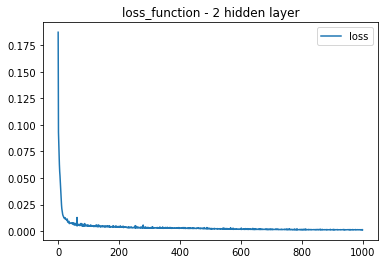

0.9982077313919852
0.9983758292546735


In [22]:
# Define the model - deep neural net 3X
number_input_features = 5
hidden_nodes_layer1 = 15
hidden_nodes_layer2 = 5
epochs=1000
nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))


nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train_scaled, epochs=epochs)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 2 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train_scaled, y_train_pred))
print(r2_score(y_test_scaled, y_test_pred))

### Deep Neural Network with three hidden layers 

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 15)                90        
_________________________________________________________________
dense_25 (Dense)             (None, 7)                 112       
_________________________________________________________________
dense_26 (Dense)             (None, 3)                 24        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 4         
Total params: 230
Trainable params: 230
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
29840/29840 [==============================] - 1s 39us/sample - loss: 0.3804 - mean_squared_error: 0.3804
Epoch 2/100
29840/29840 [==============================] - 1s 37us/sample - loss: 0.0908 - mean_squared_error: 0.0908
Epoch 3/100
29840

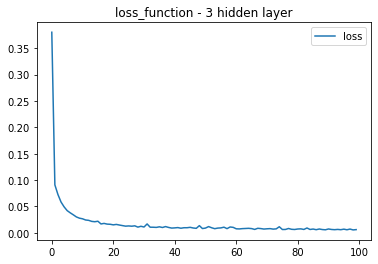

0.9932562767169728
0.9934237516990502


In [37]:
# Define the model - deep neural net 3X
number_input_features = 5
hidden_nodes_layer1 = 15
hidden_nodes_layer2 = 7
hidden_nodes_layer3 = 3

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Third hidden layer
nn.add(Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(Dense(units=1, activation="linear"))


nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train_scaled, epochs=100)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 3 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train_scaled, y_train_pred))
print(r2_score(y_test_scaled, y_test_pred))

## Predicting Number of Cases- with NN Model

In [130]:
df_cases_ml.head()

,population,population_density,median_age,ContainmentHealthIndex_updated,StringencyIndex_updated,total_cases_updated
0,106766,584.8,41.2,3.03,0.00,2
1,106766,584.8,41.2,34.85,33.33,2
2,106766,584.8,41.2,34.85,33.33,4
3,106766,584.8,41.2,43.94,44.44,4
4,106766,584.8,41.2,43.94,44.44,4


In [131]:
# Check to make sure dtypes are appropriate .
df_cases_ml.dtypes

population                          int64
population_density                float64
median_age                        float64
ContainmentHealthIndex_updated    float64
StringencyIndex_updated           float64
total_cases_updated                 int64
dtype: object

In [132]:
# Check shape before dropping na
df_cases_ml.shape

(32277, 6)

In [133]:
# Drop rows with null values
df_cases_ml=df_death_ml.dropna(how='any')
df_cases_ml.shape

(32277, 6)

In [134]:
# create features(X) and target(y) sets
X = df_cases_ml.drop(['total_cases_updated'],axis=1).values

y = df_cases_ml['total_cases_updated'].values
y = y.reshape(-1,1)

In [135]:
# Check shape for num of features
X.shape

(32277, 5)

In [136]:
# Split dataset into training and testing 
# train 90% of data, test 10%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

# scale data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

y_scaler = StandardScaler()
y_scaler.fit(y_train)

y_train_scaled = y_scaler.transform(y_train)
y_test_scaled =y_scaler.transform(y_test)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


 the mean_squared error is :0.00027 and the r2_score is:1.000
Feature: 0, Score: 0.04231
Feature: 1, Score: 0.01209
Feature: 2, Score: 0.01076
Feature: 3, Score: 0.06919
Feature: 4, Score: 0.86566


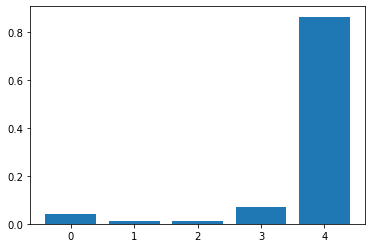

In [137]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
# X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train_scaled, y_train_scaled)
# predict y
y_pred=model.predict(X_test_scaled)
# print(y_pred)

# calculate mean square error
mse=mean_squared_error(y_test_scaled,y_pred)

# calculate r2 score
r2=r2_score(y_test_scaled, y_pred)

print(f' the mean_squared error is :{mse:.5f} and the r2_score is:{r2:.3f}')



# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 11        
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
28269/28269 [==============================] - 1s 26us/sample - loss: 0.4363 - mean_squared_error: 0.4363
Epoch 2/100
28269/28269 [==============================] - 1s 27us/sample - loss: 0.1234 - mean_squared_error: 0.1234
Epoch 3/100
28269/28269 [==============================] - 1s 24us/sample - loss: 0.1116 - mean_squared_error: 0.1116
Epoch 4/100
28269/28269 [==============================] - 1s 25us/sample - loss: 0.1077 - mean_squared_error: 0.1077
Epoch 5/100
28269/28269 [=======================

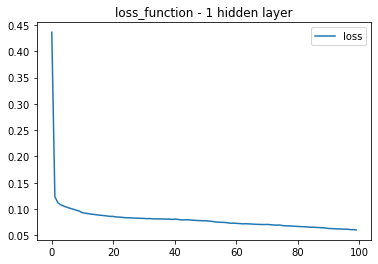

0.9391476842327598
0.9497952295976537


In [25]:
# define model - shallow neural net
number_hidden_nodes = 10
number_input_features = 5
epochs=100
nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu"))
nn.add(Dense(1, activation="linear"))

nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train_scaled, epochs=epochs )

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train_scaled, y_train_pred))
print(r2_score(y_test_scaled, y_test_pred))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 15)                90        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 16        
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
28269/28269 [==============================] - 1s 34us/sample - loss: 0.3299 - mean_squared_error: 0.3299
Epoch 2/500
28269/28269 [==============================] - 1s 36us/sample - loss: 0.1237 - mean_squared_error: 0.1237
Epoch 3/500
28269/28269 [==============================] - 1s 27us/sample - loss: 0.1142 - mean_squared_error: 0.1142
Epoch 4/500
28269/28269 [==============================] - 1s 27us/sample - loss: 0.1098 - mean_squared_error: 0.1098
Epoch 5/500
28269/28269 [=====================

28269/28269 [==============================] - 1s 21us/sample - loss: 0.0374 - mean_squared_error: 0.0374
Epoch 131/500
28269/28269 [==============================] - 1s 20us/sample - loss: 0.0374 - mean_squared_error: 0.0374
Epoch 132/500
28269/28269 [==============================] - 1s 19us/sample - loss: 0.0374 - mean_squared_error: 0.0374
Epoch 133/500
28269/28269 [==============================] - 1s 19us/sample - loss: 0.0374 - mean_squared_error: 0.0374
Epoch 134/500
28269/28269 [==============================] - 1s 18us/sample - loss: 0.0371 - mean_squared_error: 0.0371
Epoch 135/500
28269/28269 [==============================] - 1s 22us/sample - loss: 0.0372 - mean_squared_error: 0.0372
Epoch 136/500
28269/28269 [==============================] - 1s 19us/sample - loss: 0.0370 - mean_squared_error: 0.0370
Epoch 137/500
28269/28269 [==============================] - 1s 19us/sample - loss: 0.0371 - mean_squared_error: 0.0371
Epoch 138/500
28269/28269 [===========================

28269/28269 [==============================] - 1s 22us/sample - loss: 0.0237 - mean_squared_error: 0.0237
Epoch 263/500
28269/28269 [==============================] - 1s 21us/sample - loss: 0.0236 - mean_squared_error: 0.0236
Epoch 264/500
28269/28269 [==============================] - 1s 24us/sample - loss: 0.0234 - mean_squared_error: 0.0234
Epoch 265/500
28269/28269 [==============================] - 1s 23us/sample - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 266/500
28269/28269 [==============================] - 1s 23us/sample - loss: 0.0236 - mean_squared_error: 0.0236
Epoch 267/500
28269/28269 [==============================] - 1s 19us/sample - loss: 0.0236 - mean_squared_error: 0.0236
Epoch 268/500
28269/28269 [==============================] - 1s 19us/sample - loss: 0.0244 - mean_squared_error: 0.0244
Epoch 269/500
28269/28269 [==============================] - 1s 19us/sample - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 270/500
28269/28269 [===========================

28269/28269 [==============================] - 1s 27us/sample - loss: 0.0190 - mean_squared_error: 0.0190
Epoch 395/500
28269/28269 [==============================] - 1s 26us/sample - loss: 0.0190 - mean_squared_error: 0.0190
Epoch 396/500
28269/28269 [==============================] - 1s 29us/sample - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 397/500
28269/28269 [==============================] - 1s 27us/sample - loss: 0.0193 - mean_squared_error: 0.0193
Epoch 398/500
28269/28269 [==============================] - 1s 33us/sample - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 399/500
28269/28269 [==============================] - 1s 32us/sample - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 400/500
28269/28269 [==============================] - 1s 32us/sample - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 401/500
28269/28269 [==============================] - 1s 31us/sample - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 402/500
28269/28269 [===========================

28269/28269 [==============================] - 1s 30us/sample - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 462/500
28269/28269 [==============================] - 1s 31us/sample - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 463/500
28269/28269 [==============================] - 1s 26us/sample - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 464/500
28269/28269 [==============================] - 1s 31us/sample - loss: 0.0189 - mean_squared_error: 0.0189
Epoch 465/500
28269/28269 [==============================] - 1s 26us/sample - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 466/500
28269/28269 [==============================] - 1s 29us/sample - loss: 0.0189 - mean_squared_error: 0.0189
Epoch 467/500
28269/28269 [==============================] - 1s 30us/sample - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 468/500
28269/28269 [==============================] - 1s 28us/sample - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 469/500
28269/28269 [===========================

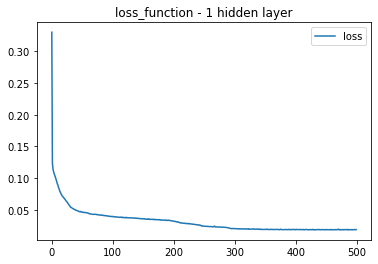

0.9817664443439905
0.9859632610396375


In [26]:
# define model - shallow neural net 3X
number_hidden_nodes = 15
number_input_features = 5
epochs=500
nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu"))
nn.add(Dense(1, activation="linear"))

nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train_scaled, epochs=epochs )

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train_scaled, y_train_pred))
print(r2_score(y_test_scaled, y_test_pred))

### Deep Neural Network with two hidden layers (The best)


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 6         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
28269/28269 [==============================] - 1s 39us/sample - loss: 0.5736 - mean_squared_error: 0.5736
Epoch 2/100
28269/28269 [==============================] - 1s 38us/sample - loss: 0.1117 - mean_squared_error: 0.1117
Epoch 3/100
28269/28269 [==============================] - 1s 38us/sample - loss: 0.0870 - mean_squared_error: 0.0870
Epoch 4/100
28269/28269 [=======

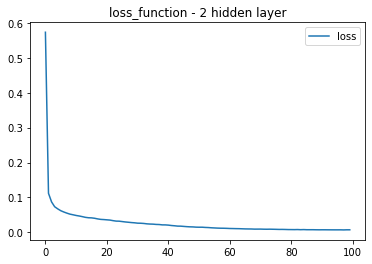

0.9934264337105635
0.990383445660475


In [33]:
# Define the model - deep neural net
number_input_features = 5
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 5

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))


nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train_scaled, epochs=100)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 2 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train_scaled, y_train_pred))
print(r2_score(y_test_scaled, y_test_pred))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 15)                90        
_________________________________________________________________
dense_29 (Dense)             (None, 5)                 80        
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 6         
Total params: 176
Trainable params: 176
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
28269/28269 [==============================] - 1s 39us/sample - loss: 0.3871 - mean_squared_error: 0.3871
Epoch 2/100
28269/28269 [==============================] - 1s 36us/sample - loss: 0.1016 - mean_squared_error: 0.1016
Epoch 3/100
28269/28269 [==============================] - 1s 36us/sample - loss: 0.0861 - mean_squared_error: 0.0861
Epoch 4/100
28269/28269 [======

Epoch 63/100
28269/28269 [==============================] - 1s 36us/sample - loss: 0.0154 - mean_squared_error: 0.0154
Epoch 64/100
28269/28269 [==============================] - 1s 34us/sample - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 65/100
28269/28269 [==============================] - 1s 34us/sample - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 66/100
28269/28269 [==============================] - 1s 36us/sample - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 67/100
28269/28269 [==============================] - 1s 34us/sample - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 68/100
28269/28269 [==============================] - 1s 34us/sample - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 69/100
28269/28269 [==============================] - 1s 37us/sample - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 70/100
28269/28269 [==============================] - 1s 33us/sample - loss: 0.0152 - mean_squared_error: 0.0152
Epoch 71/100
28269/28269 [======================

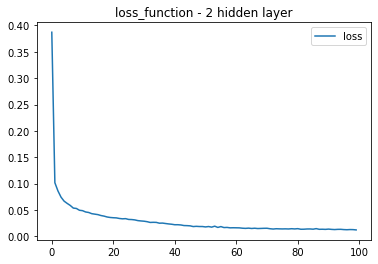

0.9865551554136006
0.9893880751774354


In [41]:
# Conclusion: did not add value
# Define the model - deep neural net 3X
number_input_features = 5
hidden_nodes_layer1 = 15
hidden_nodes_layer2 = 5

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))


nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train_scaled, epochs=100)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 2 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train_scaled, y_train_pred))
print(r2_score(y_test_scaled, y_test_pred))